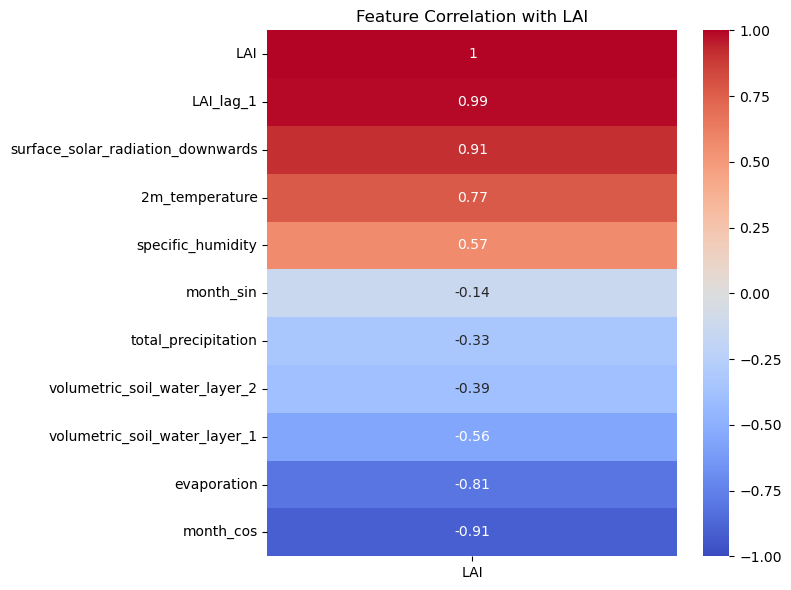

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ==========================================
# Configuration
# ==========================================
warnings.filterwarnings("ignore")

CSV_FILE = 'master_data_for_all_models_weekly.csv'
TARGET_COL = 'LAI'

CLIMATE_FEATURES = [
    "total_precipitation",
    "volumetric_soil_water_layer_1",
    "volumetric_soil_water_layer_2",
    "2m_temperature",
    "surface_solar_radiation_downwards",
    "evaporation",
    "specific_humidity"
]

TIME_FEATURES = ['month_sin', 'month_cos']
LAG_FEATURE = ['LAI_lag_1']

F_FULL = CLIMATE_FEATURES + LAG_FEATURE + TIME_FEATURES

# ==========================================
# Correlation Analysis Only
# ==========================================
def process_data(df):
    df['month_sin'] = np.sin(2 * np.pi * df.index.month / 12)
    df['month_cos'] = np.cos(2 * np.pi * df.index.month / 12)
    df['LAI_lag_1'] = df[TARGET_COL].shift(1)
    return df.dropna()


def plot_correlation(df):
    cols = F_FULL + [TARGET_COL]
    corr = df[cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr[[TARGET_COL]].sort_values(by=TARGET_COL, ascending=False),
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1
    )
    plt.title('Feature Correlation with LAI')
    plt.tight_layout()
    plt.show()


# ==========================================
# Main
# ==========================================
def main():
    df = pd.read_csv(CSV_FILE, index_col='time', parse_dates=True).sort_index()
    if df.index.freq is None:
        df = df.asfreq('W').ffill()

    df = process_data(df)
    plot_correlation(df)


if __name__ == '__main__':
    main()
